In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris

In [2]:
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/uciml/iris'
od.download(dataset_url)

Skipping, found downloaded files in ".\iris" (use force=True to force download)


In [3]:
import os
data_dir = './iris'
os.listdir(data_dir)

['database.sqlite', 'Iris.csv']

In [4]:
dataset=data_dir+'./Iris.csv'

In [5]:
iris_df=pd.read_csv(dataset)
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris_df=iris_df.drop(columns=['Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Processing the dataset

In [9]:
#Check for null values
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:>

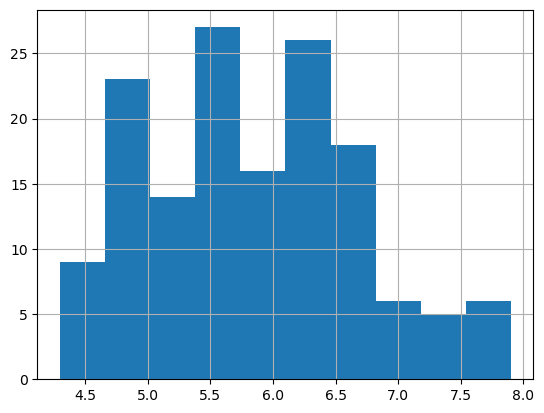

In [10]:
iris_df["SepalLengthCm"].hist()

<AxesSubplot:>

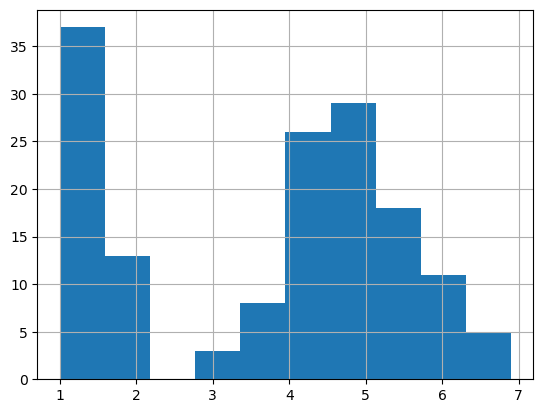

In [11]:
iris_df["PetalLengthCm"].hist()

<AxesSubplot:>

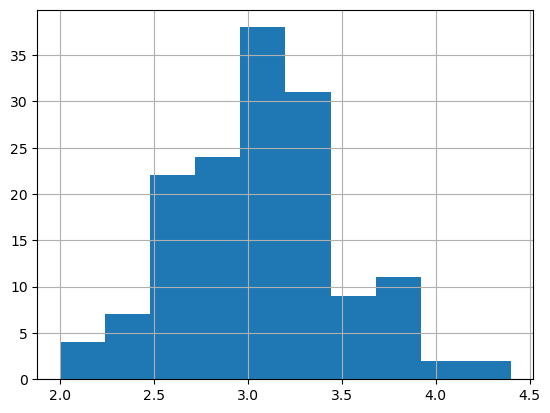

In [12]:
iris_df["SepalWidthCm"].hist()

<AxesSubplot:>

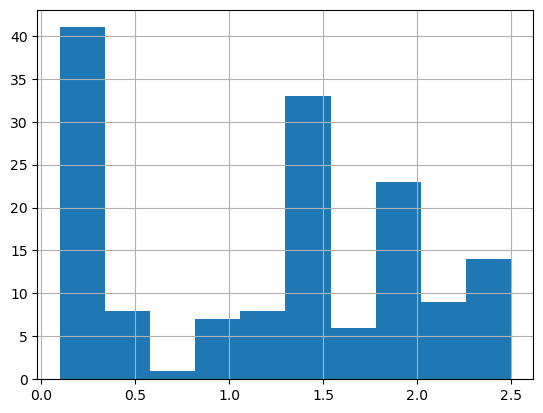

In [13]:
iris_df["PetalWidthCm"].hist()

In [14]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

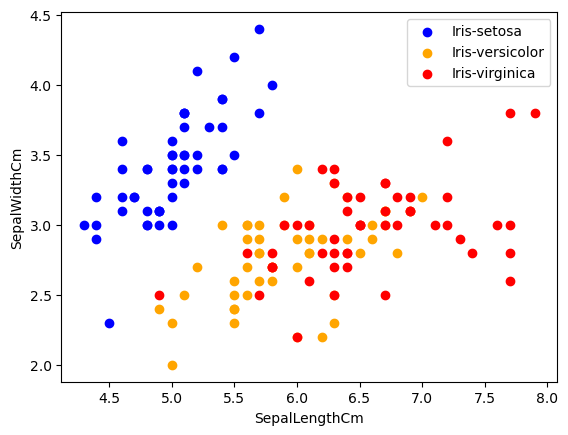

In [15]:
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
color=['Blue','Orange','Red']
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
#     print(x)
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

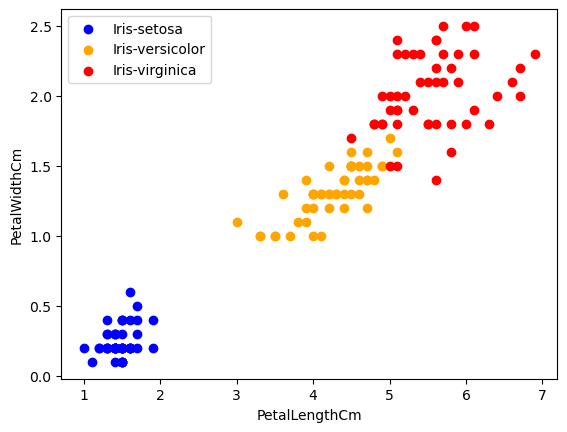

In [16]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],color=color[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

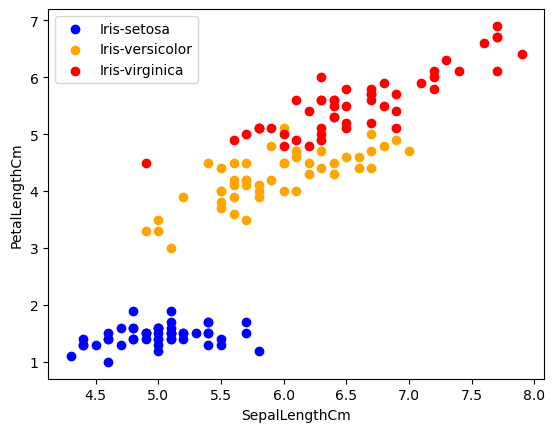

In [17]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

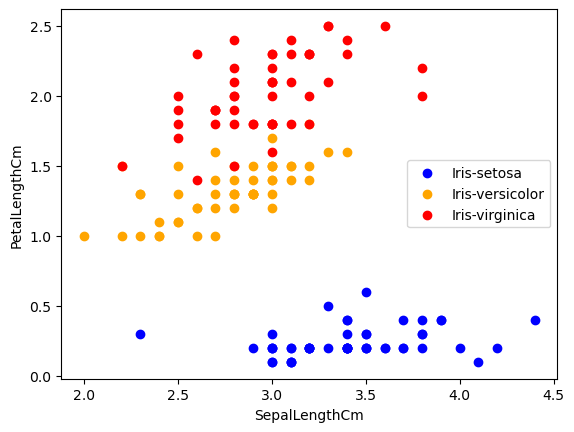

In [18]:
for i in range(3):
    x=iris_df[iris_df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

<AxesSubplot:>

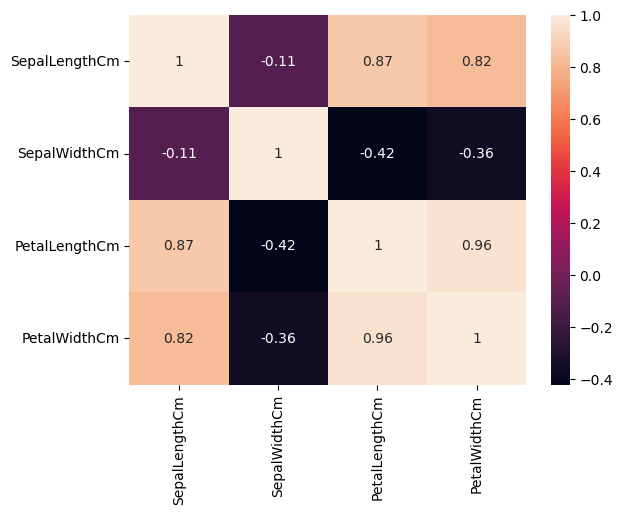

In [19]:
import seaborn as sns
sns.heatmap(iris_df.corr(),annot=True)

PetalLength->PetalWidth
</br>
PetalLength->SepalLength

### Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
iris_df['Species']=encoder.fit_transform(iris_df['Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [21]:
Y=iris_df['Species']
X=iris_df.drop(columns=['Species'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
print(x_train.shape,x_test.shape)

(112, 4) (38, 4)


#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=20000)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=20000)

In [23]:
model1.coef_,model1.intercept_

(array([[-0.37676003,  0.83006261, -2.34581225, -1.01301055],
        [ 0.62308857, -0.47335259, -0.23352335, -0.8437087 ],
        [-0.24632854, -0.35671002,  2.57933559,  1.85671925]]),
 array([  9.16096204,   1.9962768 , -11.15723884]))

In [24]:
y_pred=model1.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score=",model1.score(x_test,y_test))

Accuracy Score= 0.9473684210526315


In [26]:
cf1=confusion_matrix(y_pred,y_test)
cf1

array([[16,  0,  0],
       [ 0,  7,  0],
       [ 0,  2, 13]], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88         9
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38



### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
# model2.predict(x_test)

In [39]:
print("Acuuracy=",model2.score(x_test,y_test))

Acuuracy= 0.9473684210526315


C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
print(classification_report(y_test,model2.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88         9
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38



C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
